**When Colab clears out the instance all files are being deleted so reupload the data files and ctrl+f9 to run all cells **


In [ ]:
! unzip  ML_data.zip -d data

unzip:  cannot find or open ML_data.zip, ML_data.zip.zip or ML_data.zip.ZIP.


In [ ]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")
clear_output()

In [ ]:
!pip3 install -U lazypredict
!pip3 install -U pandas
!pip3 install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import missingno as msno 
import os 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


import lazypredict
from lazypredict.Supervised import LazyClassifier


import plotly.offline as py

py.init_notebook_mode(connected = True)



In [ ]:
os.chdir("/content/data")
data_frame_maths = pd.read_csv("Maths.csv")
data_frame_portugese = pd.read_csv("Portuguese.csv")

# Displaying the first 5 rows
print(data_frame_maths.head(5))
print(data_frame_portugese.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [ ]:
data_frame_maths.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
data_frame_portugese.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [ ]:
data_frame_maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [ ]:
data_frame_portugese.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


In [ ]:
# Copy of G3
data_frame_maths['CG3'] = data_frame_maths['G3'] 

In [ ]:
data_frame_maths

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,10


In [ ]:
for marks in range(min(data_frame_maths['G3']),max(data_frame_maths['G3'])):
  count = sum([value > marks for value in data_frame_maths['G3']])
  print(f'{marks} ----> {(count*100) / len(data_frame_maths)}')

0 ----> 90.37974683544304
1 ----> 90.37974683544304
2 ----> 90.37974683544304
3 ----> 90.37974683544304
4 ----> 90.12658227848101
5 ----> 88.35443037974683
6 ----> 84.55696202531645
7 ----> 82.27848101265823
8 ----> 74.17721518987342
9 ----> 67.0886075949367
10 ----> 52.91139240506329
11 ----> 41.0126582278481
12 ----> 33.164556962025316
13 ----> 25.31645569620253
14 ----> 18.481012658227847
15 ----> 10.126582278481013
16 ----> 6.075949367088608
17 ----> 4.556962025316456
18 ----> 1.518987341772152
19 ----> 0.25316455696202533


Average grade treshold for math is **10**

In [ ]:
for marks in range(min(data_frame_portugese['G3']),max(data_frame_portugese['G3'])):
  count = sum([value > marks for value in data_frame_portugese['G3']])
  print(f'{marks} ----> {(count*100) / len(data_frame_portugese)}')

0 ----> 97.68875192604006
1 ----> 97.5346687211094
2 ----> 97.5346687211094
3 ----> 97.5346687211094
4 ----> 97.5346687211094
5 ----> 97.38058551617874
6 ----> 96.91833590138675
7 ----> 95.37750385208012
8 ----> 89.98459167950693
9 ----> 84.59167950693374
10 ----> 69.64560862865947
11 ----> 53.62095531587057
12 ----> 42.526964560862865
13 ----> 29.892141756548536
14 ----> 20.184899845916796
15 ----> 12.63482280431433
16 ----> 7.0878274268104775
17 ----> 2.6194144838212634
18 ----> 0.3081664098613251


Average grade treshold for portuguese is **9**



In [ ]:
# Normalization

# 0 if below average
# 1 if above average

for idx, mark in data_frame_maths['G3'].iteritems():
  if mark >= 10:
    data_frame_maths['G3'][idx] = 1
  elif mark < 10:
    data_frame_maths['G3'][idx] = 0
     

In [ ]:
data_frame_maths.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,0,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,0,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,1,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,1,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,1,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,1,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,1,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,0,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,1,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,1,15


In [ ]:
# Normalization for portuegese 
for idx, mark in data_frame_portugese['G3'].iteritems():
  if mark >= 9:
    data_frame_portugese['G3'][idx] = 1
  elif mark < 9:
    data_frame_portugese['G3'][idx] = 0
     

In [ ]:
data_frame_maths.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,0,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,0,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,1,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,1,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,1,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,1,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,1,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,0,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,1,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,1,15


In [ ]:
!cd /content
!mkdir math
!cd math

mkdir: cannot create directory ‘math’: File exists


In [ ]:
for column in list(data_frame_maths.columns):
  plot = px.histogram(data_frame_maths, x=column, color='G3')
  plot.show(renderer='colab')
  plot.write_image(f"{column}.jpg")

In [ ]:
!mkdir portuegese
!cd content/data/portugese

mkdir: cannot create directory ‘portuegese’: File exists
/bin/bash: line 0: cd: content/data/portugese: No such file or directory


In [ ]:
for column in list(data_frame_portugese.columns):
  plot = px.histogram(data_frame_portugese, x=column, color='G3')
  plot.show(renderer='colab')
  plot.write_image(f"{column}.jpg")

In [ ]:
labelEnc = LabelEncoder()
categorical_features = data_frame_maths.select_dtypes(include=['object']).columns

for Feature in categorical_features:
  data_frame_maths[Feature] = labelEnc.fit_transform(data_frame_maths[Feature])

In [ ]:
data_frame_maths

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CG3
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0,6
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,0,6
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,1,10
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,1,15
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,0,9
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,1,16
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,0,7
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,1,10


In [ ]:
corr1 = data_frame_maths.corr()
corr2 = data_frame_portugese.corr()

In [ ]:
corr1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CG3
school,1.00,-0.01,0.38,-0.28,0.06,0.05,-0.13,-0.08,-0.06,0.02,...,0.03,-0.01,0.11,0.07,-0.04,-0.09,-0.03,-0.05,-0.03,-0.05
sex,-0.01,1.00,-0.03,-0.03,0.09,0.02,0.08,0.03,0.19,0.08,...,0.24,0.08,0.27,0.27,0.14,-0.07,0.09,0.09,0.07,0.10
age,0.38,-0.03,1.00,-0.15,0.04,0.03,-0.16,-0.16,-0.07,-0.04,...,0.02,0.13,0.13,0.12,-0.06,0.18,-0.06,-0.14,-0.18,-0.16
address,-0.28,-0.03,-0.15,1.00,0.07,-0.04,0.14,0.07,0.11,-0.00,...,0.03,0.07,-0.09,-0.10,-0.04,-0.03,0.07,0.13,0.05,0.11
famsize,0.06,0.09,0.04,0.07,1.00,-0.15,-0.04,-0.06,0.07,-0.08,...,0.02,0.02,0.10,0.10,-0.03,0.04,0.07,0.08,0.04,0.08
Pstatus,0.05,0.02,0.03,-0.04,-0.15,1.00,-0.12,-0.09,-0.05,0.03,...,0.04,0.00,-0.03,0.01,0.02,-0.13,-0.02,-0.04,-0.04,-0.06
Medu,-0.13,0.08,-0.16,0.14,-0.04,-0.12,1.00,0.62,0.45,0.16,...,0.03,0.06,0.02,-0.05,-0.05,0.10,0.21,0.22,0.12,0.22
Fedu,-0.08,0.03,-0.16,0.07,-0.06,-0.09,0.62,1.00,0.24,0.20,...,-0.01,0.04,0.00,-0.01,0.01,0.02,0.19,0.16,0.11,0.15
Mjob,-0.06,0.19,-0.07,0.11,0.07,-0.05,0.45,0.24,1.00,0.20,...,0.11,0.00,0.08,-0.01,0.07,0.05,0.08,0.10,0.03,0.10
Fjob,0.02,0.08,-0.04,-0.00,-0.08,0.03,0.16,0.20,0.20,1.00,...,-0.05,0.01,0.08,0.07,-0.02,0.01,0.06,0.07,0.03,0.04


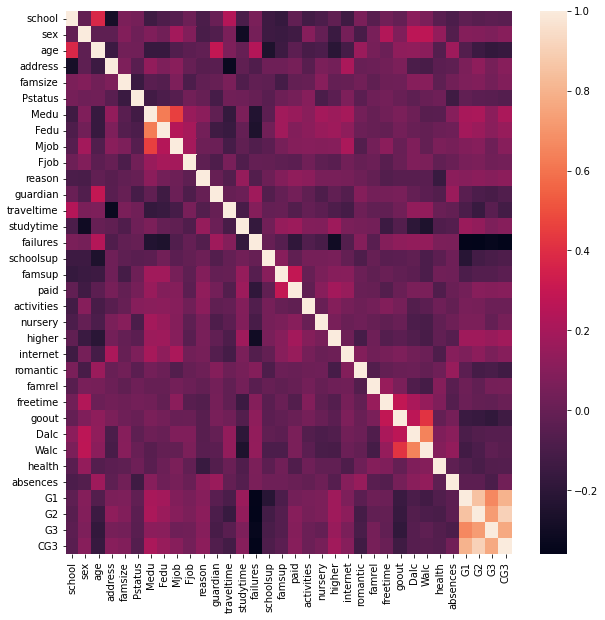

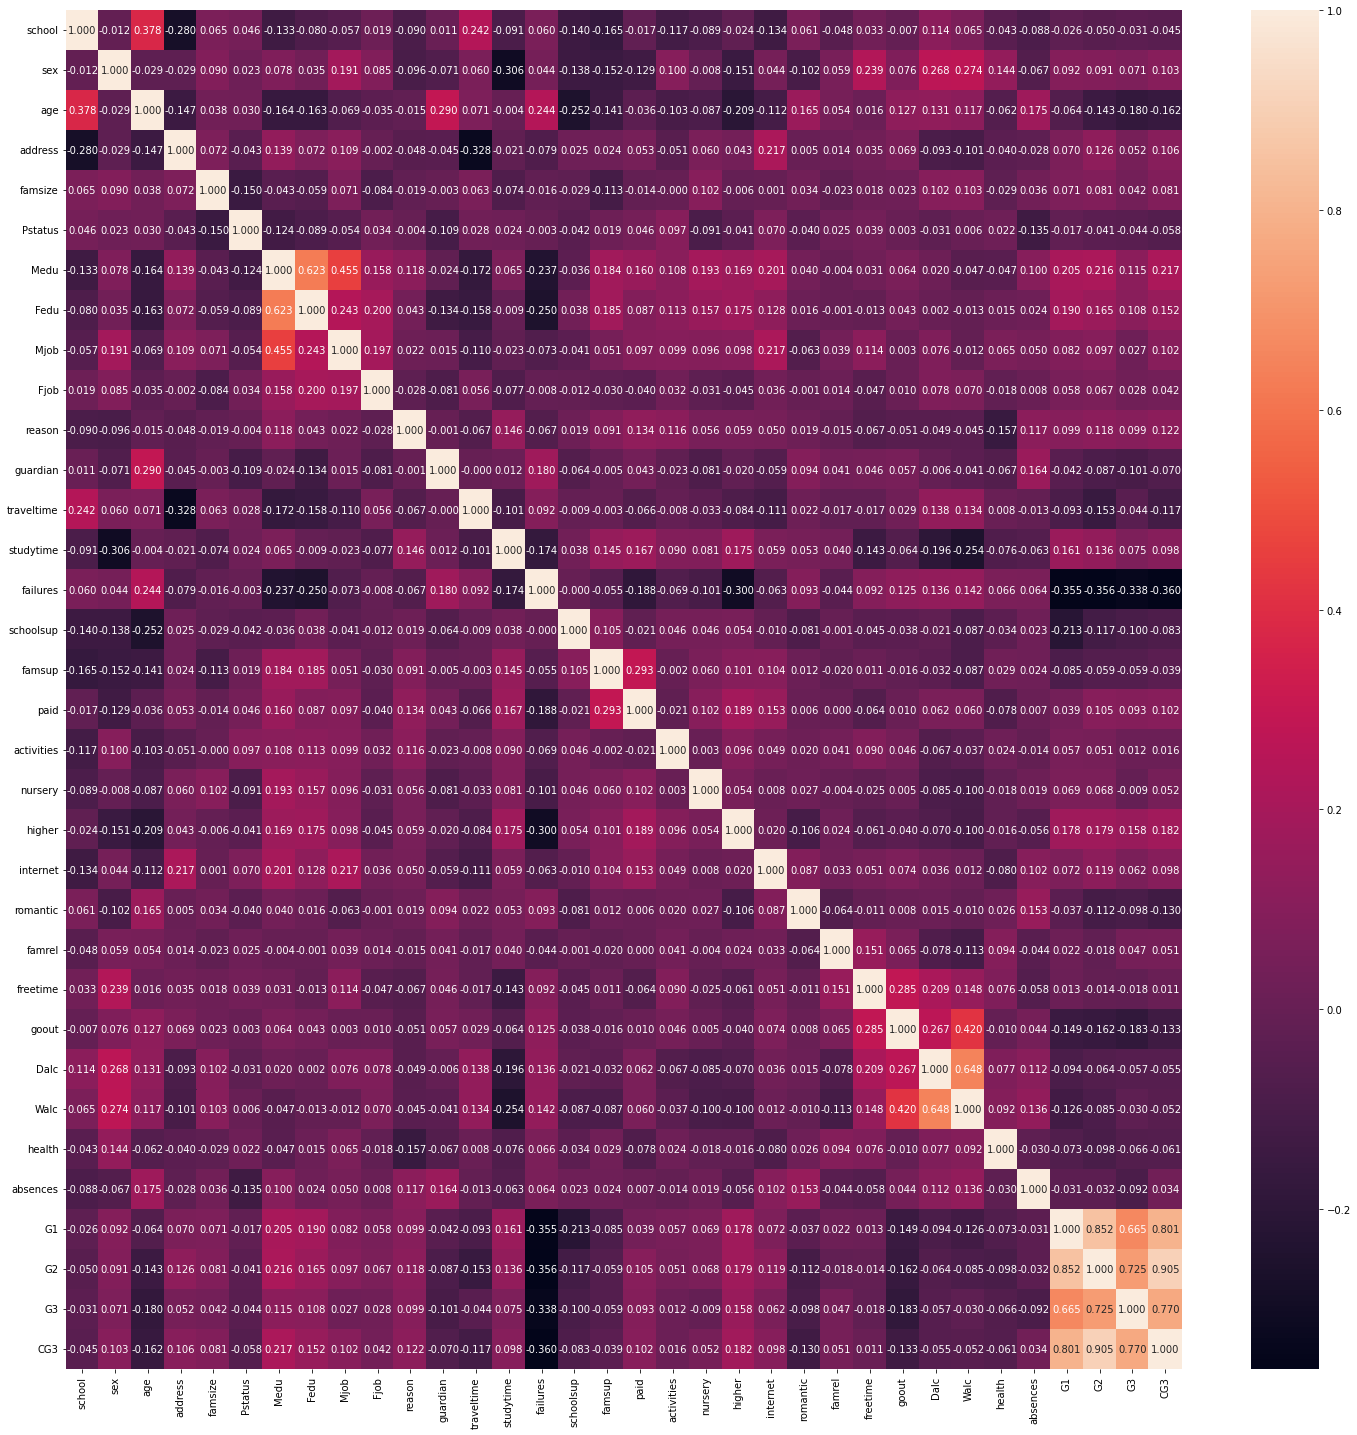

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr1)
plt.figure(figsize = (25,25))
sns.heatmap(corr1, annot=True,  fmt=".3f")

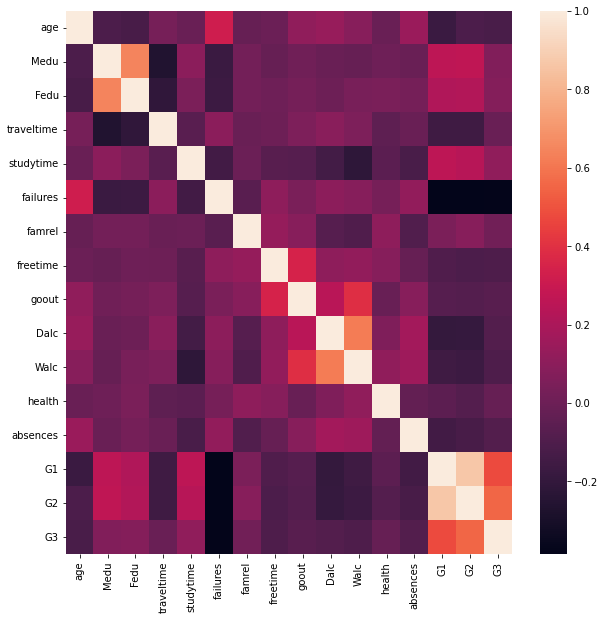

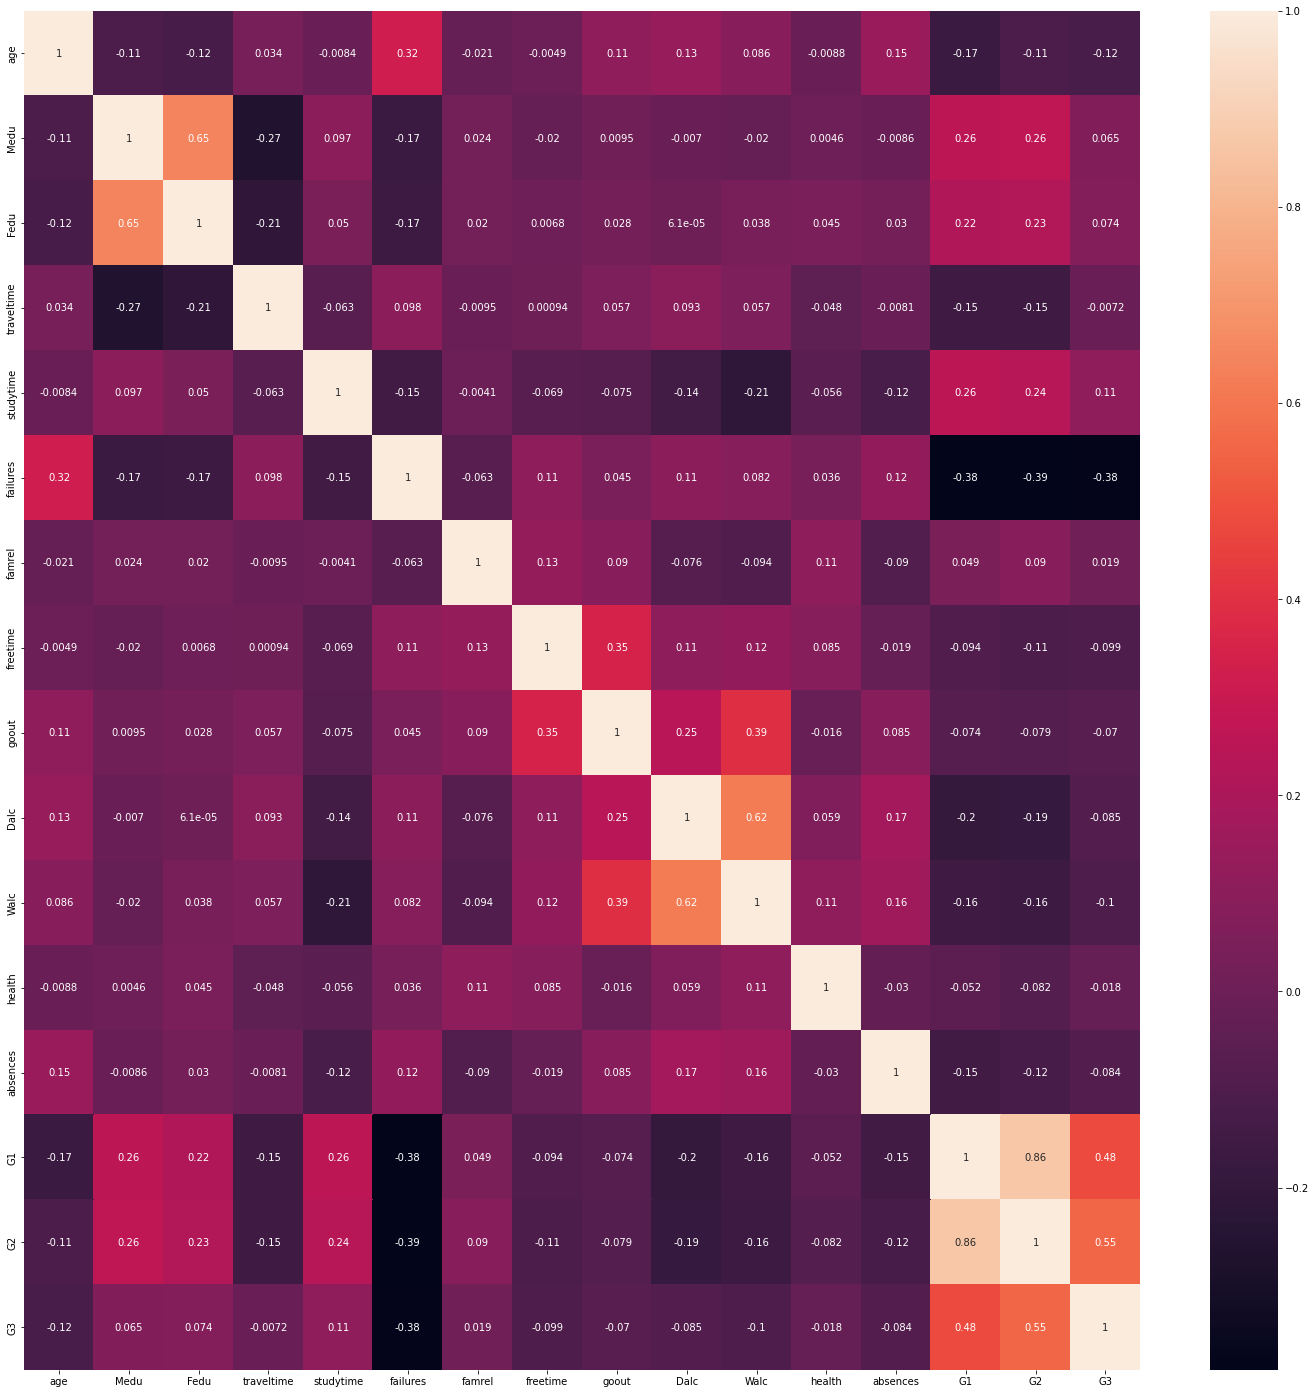

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr2)
plt.figure(figsize = (25,25))
sns.heatmap(corr2, annot=True)

In [ ]:
X = data_frame_maths.drop(['G3'], axis=1)
y = data_frame_maths['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix



rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# Accuracy of the model

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

Accuracy: 1.00


In [ ]:
confusion_matrix(y_test, y_pred)
# indicates that the model made 50 + 81 = 131 correct predictions and 0 incorrect predictions

array([[50,  0],
       [ 0, 81]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        81

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



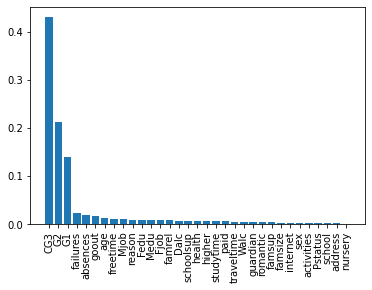

In [ ]:
importances = rfc.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importance scores
names = [X.columns[i] for i in indices]


plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)


plt.show()

In [ ]:
labelEnc = LabelEncoder()
categorical_features = data_frame_portugese.select_dtypes(include=['object']).columns

for Feature in categorical_features:
  data_frame_portugese[Feature] = labelEnc.fit_transform(data_frame_portugese[Feature])

In [ ]:
data_frame_portugese

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,1
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


In [ ]:
X = data_frame_portugese.drop(['G3'], axis=1)
y = data_frame_portugese['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix



rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# Accuracy of the model

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

Accuracy: 0.97


In [ ]:
confusion_matrix(y_test, y_pred)
#the model made a total of 5 + 1 = 6 misclassifications.

array([[ 12,   5],
       [  1, 197]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,))


              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.98      0.99      0.98       198

    accuracy                           0.97       215
   macro avg       0.95      0.85      0.89       215
weighted avg       0.97      0.97      0.97       215



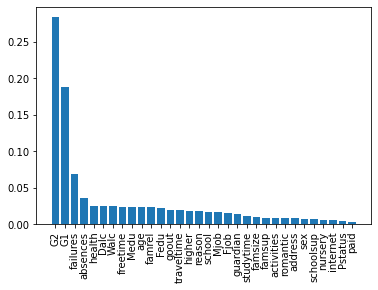

In [ ]:
importances = rfc.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importance scores
names = [X.columns[i] for i in indices]


plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)


plt.show()

In [ ]:
#This will train a random forest classifier on the most important features, as determined by the feature importance scores calculated by the original random forest classifier


X = data_frame_maths.drop(['G3', 'CG3'], axis=1)

y = data_frame_maths['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel



rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

sfm = SelectFromModel(rfc, threshold=0.1)
sfm.fit(X_train, y_train)

X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

rfc_selected = RandomForestClassifier(random_state=0)
rfc_selected.fit(X_train_selected, y_train)

# Get the names of the selected features
selected_features = sfm.get_support()
feature_names = X.columns[selected_features]

print(feature_names)



# Accuracy of the model

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

Index(['G1', 'G2'], dtype='object')
Accuracy: 0.91


In [ ]:

X = data_frame_portugese.drop(['G3'], axis=1)
y = data_frame_portugese['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel



rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

sfm = SelectFromModel(rfc, threshold=0.1)
sfm.fit(X_train, y_train)

X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

rfc_selected = RandomForestClassifier(random_state=0)
rfc_selected.fit(X_train_selected, y_train)

# Get the names of the selected features
selected_features = sfm.get_support()
feature_names = X.columns[selected_features]

print(feature_names)



# Accuracy of the model

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

Index(['G1', 'G2'], dtype='object')
Accuracy: 0.97


# Below I have handpicked some features to see if we can have an accurate model only with these features





In [ ]:
X_handpicked = data_frame_maths[['failures','absences','goout']]
y = data_frame_maths['G3']

X_train, X_test, y_train, y_test = train_test_split(X_handpicked, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

print(classification_report(y_test, y_pred,))

confusion_matrix(y_test, y_pred)


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.85      0.34      0.49        50
           1       0.70      0.96      0.81        81

    accuracy                           0.73       131
   macro avg       0.78      0.65      0.65       131
weighted avg       0.76      0.73      0.69       131



array([[17, 33],
       [ 3, 78]])

Failures, absences, alcohol consumption as our features for Portugese


In [ ]:
X_handpicked = data_frame_portugese[['failures','absences','Dalc']]
y = data_frame_portugese['G3']

X_train, X_test, y_train, y_test = train_test_split(X_handpicked, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

print(classification_report(y_test, y_pred,))

confusion_matrix(y_test, y_pred)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.38      0.29      0.33        17
           1       0.94      0.96      0.95       198

    accuracy                           0.91       215
   macro avg       0.66      0.63      0.64       215
weighted avg       0.90      0.91      0.90       215



array([[  5,  12],
       [  8, 190]])

Only alcohol consumption as our feature and here we can see that alcohol consumption alone is enough to make accurate predictions

In [ ]:
X_handpicked = data_frame_portugese[['Dalc']]
y = data_frame_portugese['G3']

X_train, X_test, y_train, y_test = train_test_split(X_handpicked, y, test_size = 0.33, random_state = 42)

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)  
print('Accuracy: %.2f' % acc)

print(classification_report(y_test, y_pred,))

confusion_matrix(y_test, y_pred)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       198

    accuracy                           0.92       215
   macro avg       0.46      0.50      0.48       215
weighted avg       0.85      0.92      0.88       215



array([[  0,  17],
       [  0, 198]])

# **Comparing accuracy of different ML models with LazyClassfier** 

In [ ]:
X = data_frame_maths.drop(['G3'], axis=1)
y = data_frame_maths['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 27.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.04
XGBClassifier,1.00,1.00,1.00,1.00,0.06
RandomForestClassifier,1.00,1.00,1.00,1.00,0.18
LGBMClassifier,1.00,1.00,1.00,1.00,0.03
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01
LinearSVC,0.98,0.98,0.98,0.98,0.05
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.03
CalibratedClassifierCV,0.97,0.96,0.96,0.97,0.05
